# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [578]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [579]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [580]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [581]:
df_train.shape

(15223, 52)

In [582]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [583]:
df_test.shape

(14910, 52)

In [584]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [585]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [586]:
df = df_test.append(df_train).reset_index(drop=True)

In [587]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [589]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Здравоохранение', 'Туризм', 'Салоны красоты и здоровья', 'Маркетинг', 'Химия/Парфюмерия/Фармацевтика', 'Наука', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Управляющая компания', 'Строительство', 'Развлечения/Искусство', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'Недвижимость', 'Подбор персонала', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Другие сферы', 'Сборочные производства', 'Банк/Финансы', 'Образование', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Металлургия/Промышленность/Машиностроение', 'Информационные услуги', 'Энергетика', 'Транспорт', 'Страхование', 'Торговля', 'Государственная служба', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [590]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
Да, в данных есть пропуски (columns GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED)
1. Некоторые категории можно удалить как не представляющие интереса для подсчетов(в данном случае TP_PROVINCE,ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR) 
2. Категория PREVIOUS_CARD_NUM_UTILIZED содержит NaN, если у клиента не было случаев утилизации карт. То есть нам необходимо сменить данные на нулевые, где пропуск
3. Столбец WORK_TIME можно заполнить через среднее значение/медиану по выборке, но данных очень мало, поэтому для точности лучше удалить столбец
4. Данные из столбцов GEN_INDUSTRY, GEN_TITLE могут представлять интерес для подсчетов, но являются категориальными. 
Возможно стоит обучить предварительно машину определять по остальным данным, к какой отрасли могут быть отнесены данные наблюдения. 
Но на данный момент придется просто удалить эти столбцы. 


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Да, среди данных есть категориальные признаки. Работать с ними можно через one hot encoding (используя get_dummies)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [591]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    #1
    df_output = df_output.drop(columns = ['AGREEMENT_RK', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'WORK_TIME'])
    
    #2
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    #3

    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    #4
    df_output  = pd.get_dummies(df_output,columns = ['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'REGION_NM'])
    
    return df_output

In [592]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [593]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 313 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(31), object(1), uint8(275)
memory usage: 16.6+ MB


In [594]:
df_preproc = df_preproc.drop(columns = ['sample'], axis = 1)

In [595]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 312 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(31), uint8(275)
memory usage: 16.4 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [712]:
y = df_train_preproc['TARGET'].values
X = df_train_preproc.drop(['TARGET'], axis = 1)

In [713]:
y_test = df_test_preproc['TARGET'].values
X_test = df_test_preproc.drop(['TARGET'], axis = 1)

In [714]:
X.shape

(15223, 311)

In [715]:
X_test.shape

(14910, 311)


#### Задание 5. Обучение и оценка качества разных моделей

In [716]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42


In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [718]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict1 = dtc.predict(X_test)


In [719]:
predict_proba = dtc.predict_proba(X_test)

In [720]:
predict_proba[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [721]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))
print('accuracy', accuracy_score(y_test, predict1))


precision 0.18363636363636363
recall 0.18198198198198198
accuracy 0.8022772060433545


In [722]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict2 = rfc.predict(X_test)

print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))
print('accuracy', accuracy_score(y_test, predict2))

precision 0.20833333333333334
recall 0.009009009009009009
accuracy 0.8754105539741625


In [723]:
predict_proba2 = rfc.predict_proba(X_test)

In [724]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict3 = lr.predict(X_test)

print('precision', precision_score(y_test, predict3))
print('recall', recall_score(y_test, predict3))
print('accuracy', accuracy_score(y_test, predict3))

precision 0.3333333333333333
recall 0.0036036036036036037
accuracy 0.8780380994088023


In [725]:
predict_proba3 = lr.predict_proba(X_test)

In [726]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
## Your Code Here
pc1 = precision_score(y_test, predict1)
pc2 = precision_score(y_test, predict2)
pc3 = precision_score(y_test, predict3)
rc1 = recall_score(y_test, predict1)
rc2 = recall_score(y_test, predict2)
rc3 = recall_score(y_test, predict3)
ac1 = accuracy_score(y_test, predict1)
ac2 = accuracy_score(y_test, predict2)
ac3 = accuracy_score(y_test, predict3)


In [727]:
precision_score = pc1, pc2, pc3
recall_score = rc1, rc2, rc3
accuracy_score = ac1, ac2, ac3

In [728]:
a = [('DecisionTreeClassifier', pc1, rc1, ac1),
    ('RandomForestClassifier', pc2, rc2, ac2),
    ('LogisticRegression', pc3, rc3, ac3)]
labels = ['model', 'precision_score', 'recall_score', 'accuracy_score']
data = pd.DataFrame.from_records(a, columns = labels)

In [729]:
data

,model,precision_score,recall_score,accuracy_score
0,DecisionTreeClassifier,0.183636,0.181982,0.802277
1,RandomForestClassifier,0.208333,0.009009,0.875411
2,LogisticRegression,0.333333,0.003604,0.878038


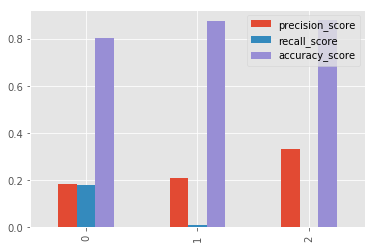

In [730]:
data.plot(kind = 'bar')

In [740]:
pp = predict_proba, predict_proba2, predict_proba3

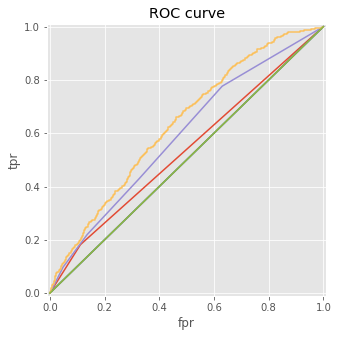

In [748]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))
for i in pp:
    fpr, tpr, thresholds = roc_curve(y_test, i[:,1])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.title('ROC curve')
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))



In [752]:
roc_auc_score(y_test, predict_proba[:,1])

0.5350338623768335

In [753]:
roc_auc_score(y_test, predict_proba2[:,1])

0.5895915856035497

In [754]:
roc_auc_score(y_test, predict_proba3[:,1])

0.6329637214482678

In [757]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5322104695780999

In [758]:
cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5866692081447304

In [759]:
cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.6289660005302251

In [769]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
predict = lr.predict_proba(X_test)
predict[:,1]

array([0.26760214, 0.05357238, 0.20462344, ..., 0.07012198, 0.08807666,
       0.03566429])

In [770]:
# Померить roc_auc на тесте
cross_val_score(
    lr,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
).mean()

0.6476251764947004